In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from core.data import load_from_kaggle


c:\Anna-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "mateoabbott/e-commerce-consumer-behavior-and-purchase-data" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\e-commerce-consumer-behavior-and-purchase-data' already exists with files. Skipping download (replace=False).


In [3]:
files

['E-Commerce Customer Data.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Payment_Frequency,Time_to_Decision,Delivery_Status
0,CUST-000001,68.0,Male,Middle,Married,Master's,Manager,Phoenix,Beauty,39.74,...,Smartphone,Credit Card,2024-08-03 23:00:00,No,Yes,Wants-based,Standard,One-time,18,Returned
1,CUST-000002,48.0,Female,Middle,Single,High School,Engineer,New York,Sports,120.84,...,Desktop,Cash,2024-03-23 13:00:00,Yes,No,Need-based,No Preference,Subscription,3,Delivered
2,CUST-000003,57.0,Male,Middle,Married,Doctorate,Manager,New York,Sports,189.59,...,Desktop,Debit Card,2024-01-06 01:00:00,Yes,Yes,Wants-based,Standard,One-time,23,Returned
3,CUST-000004,41.0,Female,Low,Married,High School,Manager,Seattle,Furniture,321.55,...,Smartphone,Cash,2024-06-06 04:00:00,Yes,Yes,Impulsive,No Preference,One-time,16,Returned
4,CUST-000005,31.0,Female,Low,Married,Master's,Manager,Seattle,Electronics,71.10,...,Tablet,Debit Card,2024-10-23 09:00:00,Yes,No,Planned,No Preference,One-time,18,Delivered


In [5]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(12730, 30)

'Description'

,count,mean,std,min,25%,50%,75%,max
Age,12476.0,44.03,15.39,18.0,31.00,44.00,57.00,70.00
Purchase_Amount,12476.0,260.72,166.53,0.0,128.27,251.95,376.40,899.98
Frequency_of_Purchase,12476.0,10.57,5.76,1.0,6.00,11.00,16.00,20.00
Brand_Loyalty,12730.0,3.01,1.41,1.0,2.00,3.00,4.00,5.00
Product_Rating,12730.0,2.99,1.41,1.0,2.00,3.00,4.00,5.00
Time_Spent_on_Product_Research,12476.0,11.99,7.20,0.0,6.00,12.00,18.00,24.00
Return_Rate,12730.0,0.50,0.29,0.0,0.25,0.50,0.75,1.00
Customer_Satisfaction,12730.0,5.54,2.89,1.0,3.00,6.00,8.00,10.00
Time_to_Decision,12730.0,14.99,8.83,0.0,7.00,15.00,23.00,30.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Customer_ID,object,0,12730,"[CUST-003880, CUST-004674, CUST-001458]"
Age,float64,254,53,"[66.0, 37.0, 68.0]"
Gender,object,0,3,"[Female, Female, Female]"
Income_Level,object,0,3,"[Low, High, Low]"
Marital_Status,object,0,4,"[Married, Married, Single]"
Education_Level,object,0,4,"[Bachelor's, High School, Doctorate]"
Occupation,object,0,9,"[Artist, Sales, Technician]"
Location,object,0,8,"[Miami, Los Angeles, New York]"
Purchase_Category,object,0,9,"[Books, Sports, Books]"
Purchase_Amount,float64,254,11027,"[152.18, 165.12, 331.63]"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12730 entries, 0 to 12729
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer_ID                      12730 non-null  object 
 1   Age                              12476 non-null  float64
 2   Gender                           12730 non-null  object 
 3   Income_Level                     12730 non-null  object 
 4   Marital_Status                   12730 non-null  object 
 5   Education_Level                  12730 non-null  object 
 6   Occupation                       12730 non-null  object 
 7   Location                         12730 non-null  object 
 8   Purchase_Category                12730 non-null  object 
 9   Purchase_Amount                  12476 non-null  float64
 10  Frequency_of_Purchase            12476 non-null  float64
 11  Purchase_Channel                 12730 non-null  object 
 12  Brand_Loyalty     

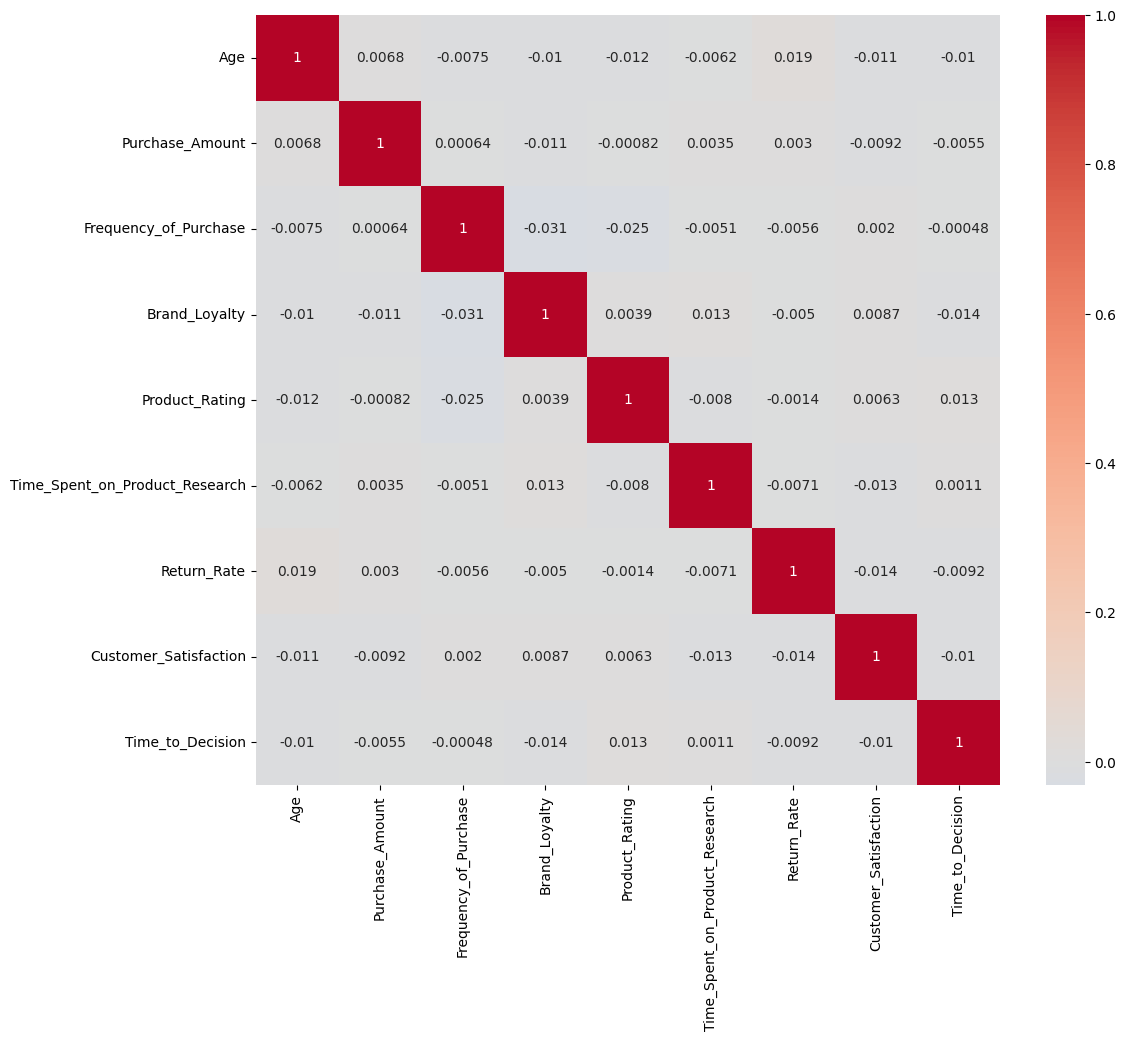

In [9]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);

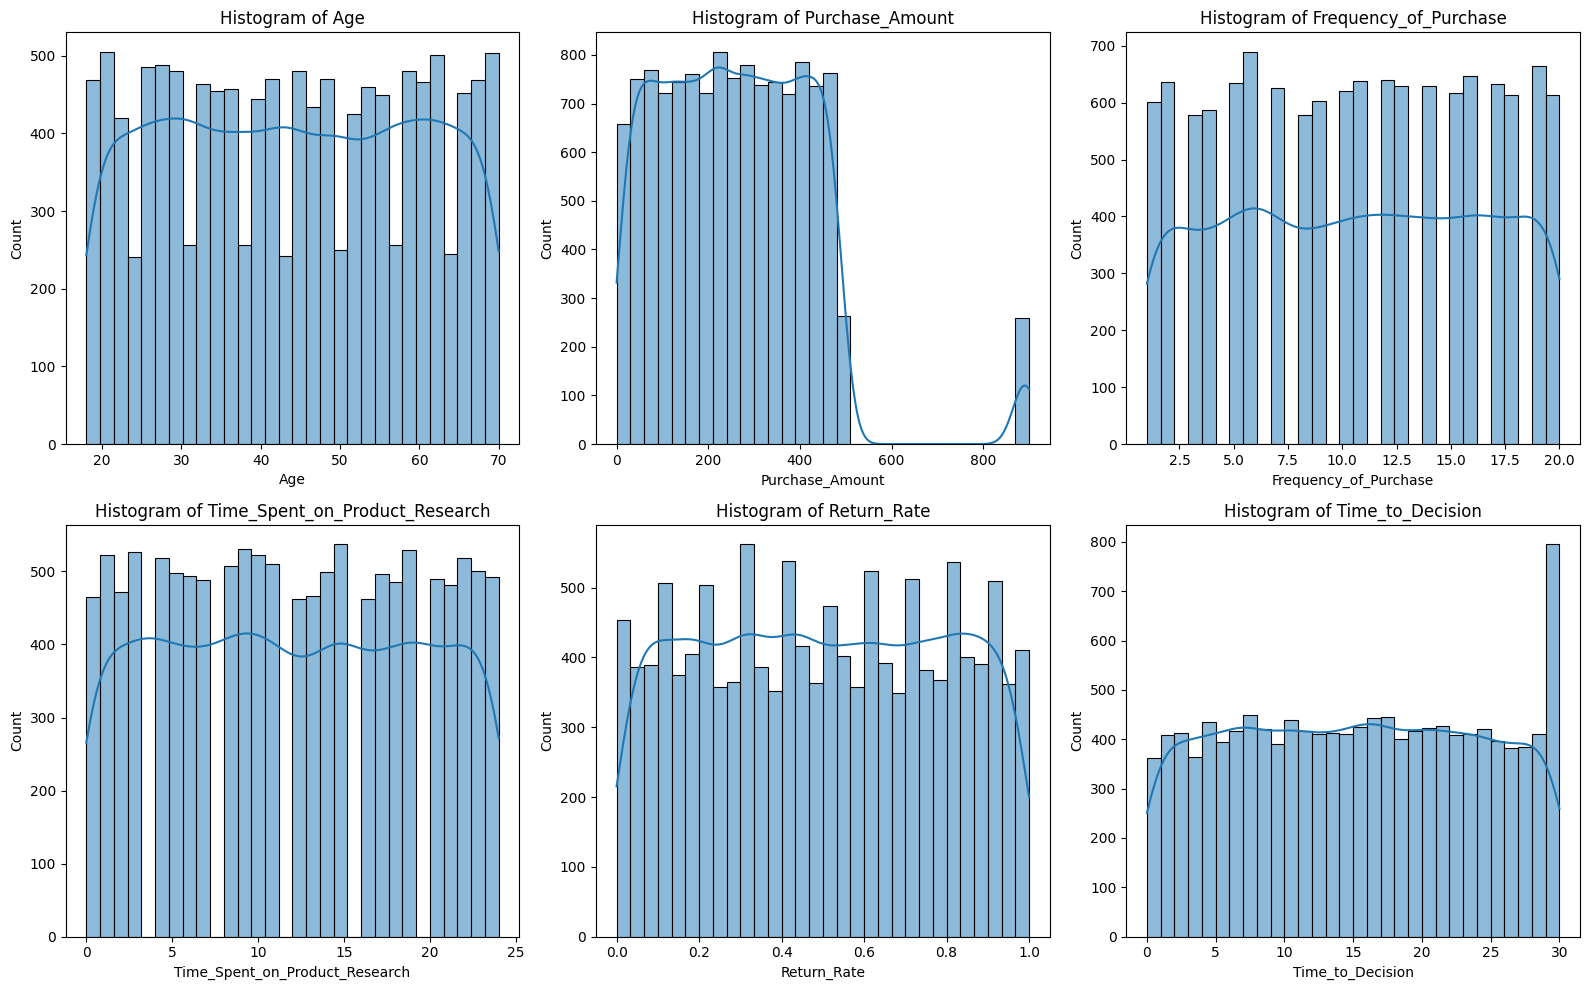

In [7]:
num_cols = ["Age", "Purchase_Amount", "Frequency_of_Purchase", 
            "Time_Spent_on_Product_Research", "Return_Rate", "Time_to_Decision"]

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

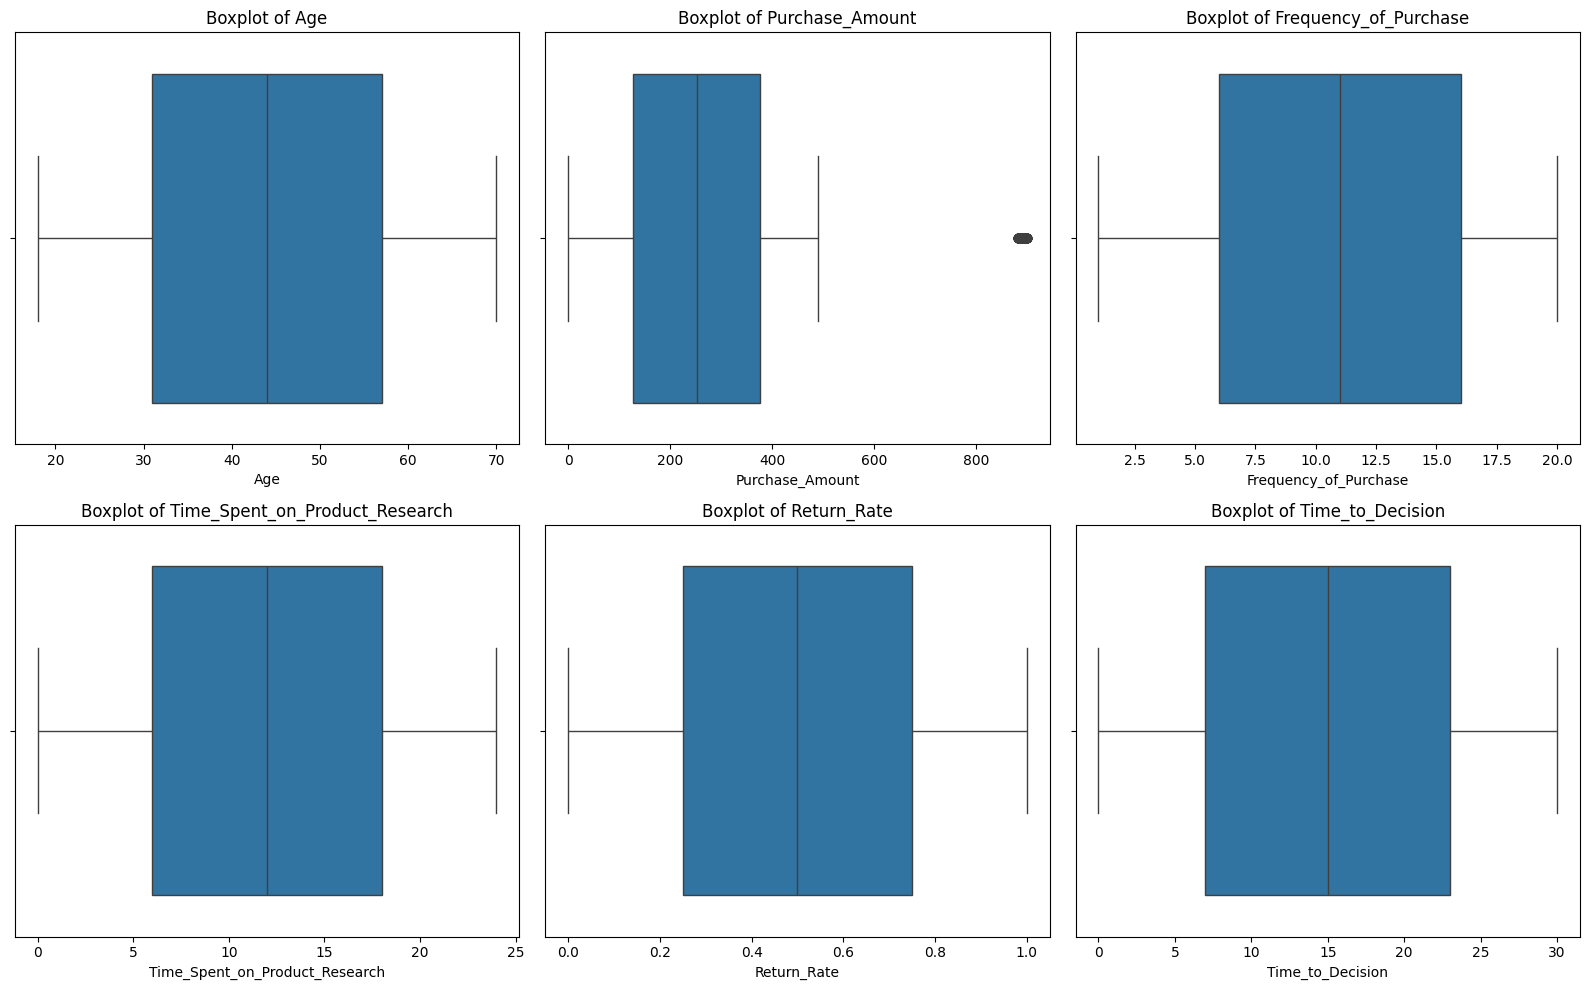

In [8]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()